ECS 171 Group Project: Group 17.
Group lead      Michael Pitts
                Albert Eo
                Pranay Mittal
                Arya Rajpal
                Jasjeet Rangi
                Nicholas Sulistio
                Alison Wu

UCI Heart dailure clinical records:
Data = https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Problem Statement:

    Medical information can be very overwhelming for a person at high risk of heart failure or disease. Doctors may inform patients that they are at high risk of developing complications or passing away due to heart failure. They then proceed to overwhelm patients with a list of every bodily metric with a complex list of numbers, chemicals and medical terms. Our product gives patients a straightforward game plan to attack a targeted set of health metrics in order to lower their chances for developing further complications. 


The intial stage of building our project is going to be exploritory data analysis, this will take part in 3 steps and have 2 goals.

The 3 steps will be:

    Understanding the data
    Cleaning the data.
    Analyzing variable relationships.

Our 2 goals will be:
        Weight and rank the relationships that lead to death.
        Find feature percentiles.

1) Understanding the data:
    Let us print of the head of our data as well as the shape of our data to see what is within and analyize what kinda of features we will be working with.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('heart_failure.csv')

print("Head: ")
print(df.head())

print(f"Shape: {df.shape}")

#set future polt size
plt.rcParams['figure.figsize'] = [10,5]

Head: 
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2

We can see that we have a total of 13 features and 299 entries in the dataset. With some reasearch into each of the measures we have come to the conclusion that each metric provides a helpful insight into an individual's heart health and because of that no columns will be dropped.

Here is the list of each feature and thier corrisponding units/definition:
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

We will now begin analyzing the relationship between variables, to being with this we will create a heat map and pairplot for the dataset's features.

<AxesSubplot:>

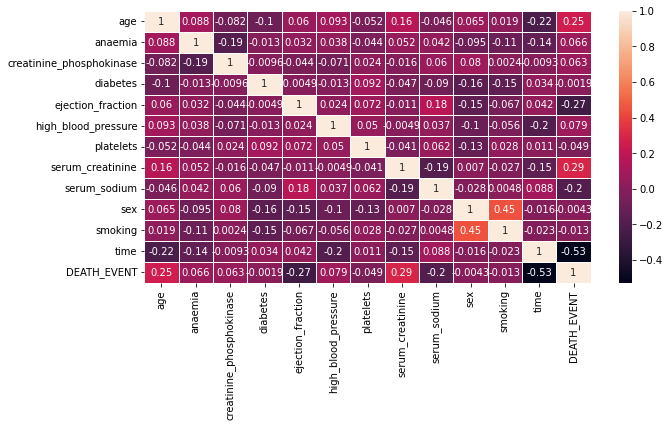

In [12]:
import seaborn as sns 

sns.heatmap(df.corr(), annot=True, linewidth=1)

We will drop all binary columns for this analysis and set hue = to sex inorder to see some of the relationships between medical measures and sex. This will inform us whether a seperate model needs to be used for each gender. 

Note that time was also dropped, this is because time represents the time until next hospital vist and we felt it was not pertinent to this pairplot.

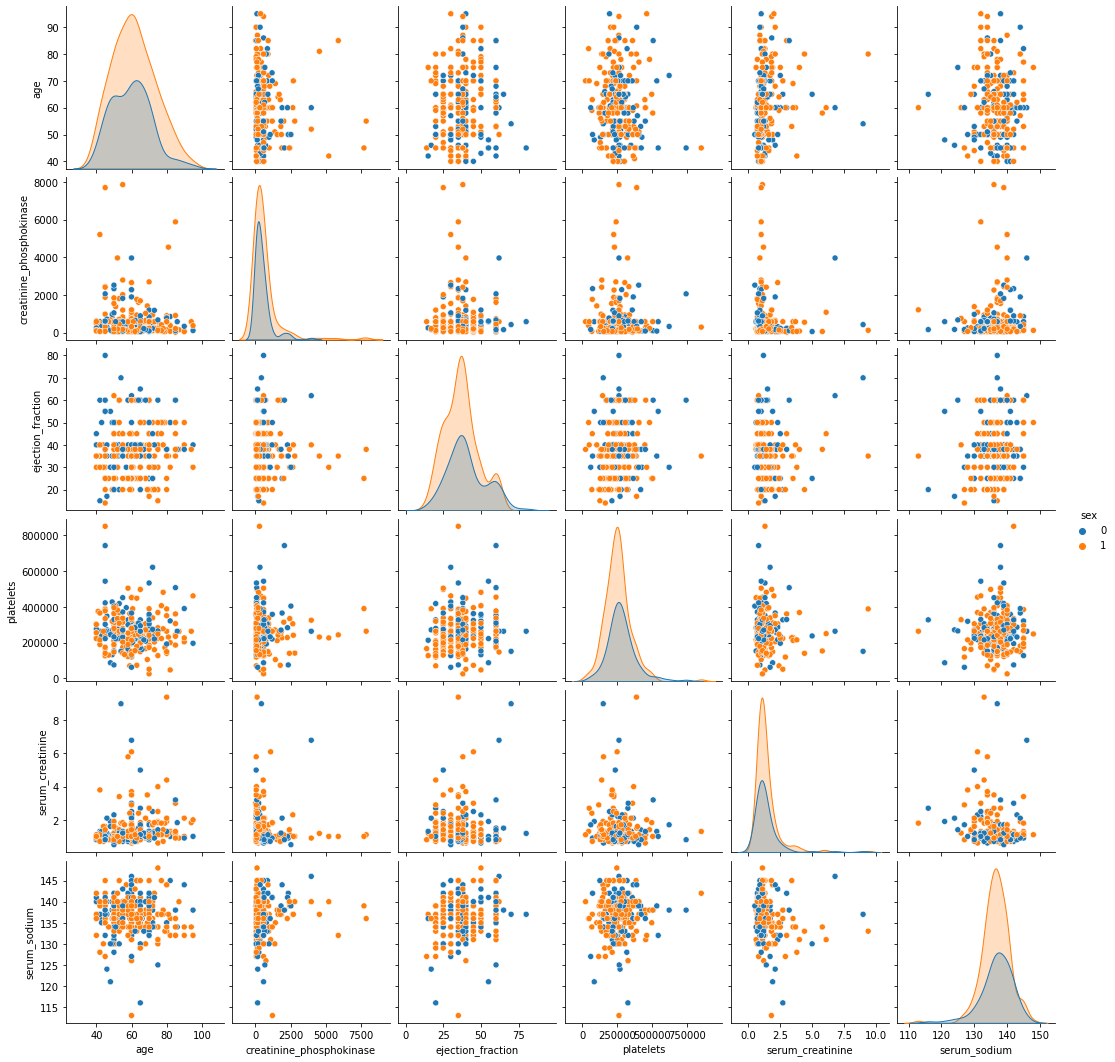

In [15]:
non_bool = df.drop(['diabetes', 'anaemia', 'high_blood_pressure', 'smoking', 'DEATH_EVENT', 'time'], axis=1)

sns.pairplot(non_bool, hue='sex')

From this pairplot we can clearly see that while the levels of each measure are in general high for men, that ratios between measures remain the same for both men and women. This can be seen with the fact that there is no relationship in which men and women create seperate discernible clusters.